# Lesson 17/18: Graph isomorphisms

_Note: Originally Lesson 17 and 18 were separate, but due to a class cancellation we are now combining them._ 

## Overview 

__Summary:__ This combined lesson takes on the question: _What does it mean for two graphs to be "the same"?_ For example, the same graph can be drawn in different ways -- in one drawing the edges may cross, and in another they may not -- or we could relabel the nodes but not change any of the "essential behavior" of the graph. What does this look like, and how do we make it formal so that we can know, with certainty and without relying on visuals, whether two graphs are "the same" or not? When two graphs are "the same" (and again, we have to first of all be clear about what this means) they are called __isomorphic__. There are two main objectives for this combined lesson: (1) To develop a rigorous definition of what it means for two graphs to be isomorphic and (2) identify __isomorphism invariants__ of graphs, which are properties of graphs that must be shared by any two graphs that are isomorphic. 

This lesson addresses the following learning targets: 

+ __GT.4__: I can determine whether two graphs are isomorphic and give clear and appropriate reasoning for my decision. (If the graphs are isomoprhic, state an isomorphism; if they are not, state a graph invariant that is violated.)

## Background

Graphs are used to model all sorts of "connected networks". One such network would be a __network of cities and roads__ within a state, province, or country. Here is one such example, using the major cities of Turkey (the country) as nodes and the highways that connect them as edges: 

<img src="tstreets.png"> 

([Click here](https://www.linkedin.com/pulse/visualization-turkey-city-map-graphs-part-1-melih-s%C3%B6zdinler?published=u) for more on how this graph was created.) 

We create graph models like this to solve problems and attain insights about the networks that they model. Some questions a person might ask about this network would include: 

+ Some cities in Turkey are more highly connected (in terms of highways) than others. Which cities are the "most connected"? 
+ How many cities in Turkey have exactly two highways leading into and out of them? 
+ Is it possible to create a "tour" of Turkey so that every city is visited exactly once and no cities are left out? Is there such a tour that starts and ends at the same city? 

All of these questions have practical considerations, and in fact we'll be able to answer all these questions before the end of our course with some very simple theory that we will develop. For now, though, there is a bigger question: __Suppose that one of these questions is answered for Turkey's highway map above. Can we use the same solution for some other country's highway map?__ That is, if we find that there is a tour of Turkey that hits every city exactly once, can we then say the same thing about another country, such as Italy or the UK? 

We could do so, if we knew that the highway maps for Italy or the UK were __essentially the same__ as that of Turkey. Because if, say, Italy's highway map were "essentially the same" as Turkey's, and there is an all-cities tour of Turkey that uses highways, then we can just apply that tour to Italy merely by changing the names of the cities and highways. __If two graphs are essentially the same, then solutions to problems involving the one graph can be seamlessly applied to the other.__ Therefore having a better understanding of what it means for two graphs to be "essentially the same" is important. 

Let's scale this idea down and look at some much simpler graphs. 

Consider this graph (think of it as a "highway map") with four nodes: 

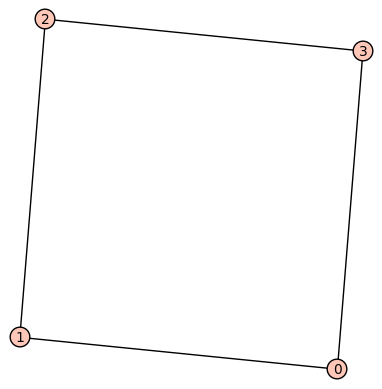

In [1]:
g1 = Graph({0:[1], 1:[2], 2:[3], 3:[0]})
g1.show()

Note that this is $C_4$, the cycle graph on four nodes that we learned about in Lesson 16. Pretend this is a graph of four cities connected by highways, and we want to arrange a tour of those cities which visits each city exactly once. Can it be done? Well, it should be obvious that it can be: One such "tour" is the path $(0, 1, 2, 3)$; there are other paths that would also work. 

Now consider this graph, which does not look superficially like the same graph as above: 

<img src="g1iso.png">

Is this graph "essentially the same" as the first one? Stop for a minute and think about it before moving on. 

---

You can make a strong case that these two graphs are "essentially the same" despite their superficial differences simply by manipulating the graph. "Untwist" the graph like so: 

<img src="g1iso2.png" height=200 width=200>

And now the only superficial differences are the node labels, but that's not really a difference that matters. We can match up the nodes to make the graphs correspond exactly: Node 2 in the first graph matches up with node `A` in the second; node 3 matches up with node `B`; node 0 with node `C`; and node 1 with node `D`. Also -- and significantly -- the _connections between the nodes_ match up as well. There was an edge betwteen nodes 2 and 3 in the first graph, and there is an edge between their counterparts `A` and `B` in the second. Likewise there was an edge between 3 and 0 and there is an edge between `B` and `C`; there is an edge between 0 and 1 and there is an edge between `C` and `D`; and finally there was an edge between 1 and 2 and there is an edge between `D` and `A`.

So between these two graphs, _there is a one-to-one correspondence between the nodes of each graph, so that if two nodes are connected in one graph then their counterparts are connected in the other, and vice versa_. 

If this `ABCD` graph were another state or country and we were trying to arrange a tour of that state or country like we did the other, it would be easy: We already have a tour for the first country via the path $(0,1,2,3)$. Since we know that the second country has "essentially the same highway map" as the first, a tour of the second country can be obtained by taking the first tour and swapping out the node labels: `(C, D, A, B)` would be our second tour. We've saved work by noticing this "essential sameness". 

Now compare both of these graphs to this one: 

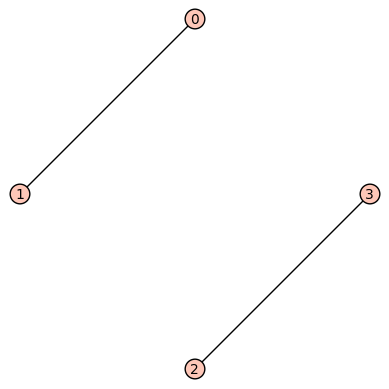

In [3]:
g2 = Graph({0:[1], 2:[3]})
g2.show(layout="circular")

This is considered one graph, in two pieces. This graph also has four nodes, but it's unlikely you would think of this graph as being "essentially the same" as the others. Mainly this is because your eye is drawn to the two disconnected pieces. _There is still a one-to-one correspondence between the nodes_ of this graph and the others, but _the connections are not preserved_. Whereas there was an edge between node 1 and node 2 in the first graph, there is not an edge there in this graph, and even if we relabel the nodes, we will end up with a connection between two nodes in the first graph that fails to be a connection in the other. 

Also consider these graphs: 

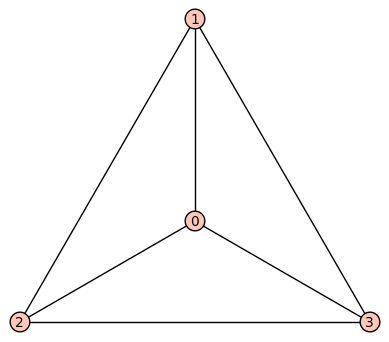

In [4]:
g3 = graphs.WheelGraph(4)
g3.show()

This one also has four nodes but it's not "essentially the same" as the others because there are "extra" edges. Note here that each "city" has three "highways" coming into and out of it, whereas that number was 2 in the first graph. We could still do a tour of this country (using the path $(0,1,2,3)$) but these graphs are not "essentially the same". 

And this one: 

<img src="g4iso2.png" height=200 width=200>

You might be tempted to say this is the "same" graph as the third one we introduced above, where the edges crossed -- but that's not the case here. This one is "different" from all the others because there are five "cities"! The edges on this one do not cross -- there is a new node where _four_ edges come together. A graph with five nodes really cannot in any sense be considered to be "the same as" a graph with four. 

We're now ready to think about a formal definition for what it means for two graphs to be "essentially the same". There appear to be two main criteria: 

+ There has to be a one-to-one correspondence between the nodes of the graphs. This means the graphs should have the same number of nodes, and more than this, there needs to be a way of "mapping" or "matching" the nodes of one graph onto the nodes of the other. And, 
+ If there is an edge connecting two nodes in one graph, then their matching counterparts in the other graph have to also be connected by an edge. 

This is the essence of our main definition. 

>__Definition:__ Let $G$ and $H$ be two (finite) graphs with (finite) vertex sets $V_G$ and $V_H$ respectively. Then $G$ and $H$ are said to be __isomorphic__ if $V_G$ and $V_H$ have the same number of elements _and_ if there is a one-to-one function $f$ from $V_G$ to $V_H$ such that $\{u,v\}$ is an edge in $G$ if and only if $\{f(u), f(v)\}$ is an edge in $H$. 

"Isomorphic" literally means "same shape", and that is the basic essence of what we are trying to define. 

__What is a "one-to-one function"?__ You know from previous mathematical work what a _function_ is: It's just a mapping from one set to another such that every input to the function has an output and no input produces two outputs. A function is _one-to-one_ if _there are no collisions_ -- that is, a function is one-to-one if _different_ inputs always produce _different_ outputs. For example, here is a function $f$ from $\{0,1,2,3\}$ to $\{A,B,C,D\}$ that is one-to-one: 

$$f(0) = C, f(1) = D, f(2) = A, f(3) = B$$

And here is a function between these two sets that is not one-to-one: 

$$f(0) = C, f(1) = C, f(2) = A, f(3) = A$$

You can see the collisions in the second one -- both 0 and 1 are sent to `C` (they "collide") and similarly 2 and 3 map to `A`. 

The language of one-to-one functions is how we formalize the idea of "matching nodes" between graphs -- the function $f$ serves just as a means of relabeling the nodes. 

__NOTE:__ Many books also add the language of "onto" into this definition, saying that the function $f$ must be both one-to-one and onto. We will simplify the definition by insisting that the two vertex sets $V_G$ and $V_H$ have the same number of elements. It can be proven (quite easily, using the [Pigeonhole Principle](https://en.wikipedia.org/wiki/Pigeonhole_principle)) that a function between finite sets of the same cardinality is one-to-one if and only if it is onto. Many students have trouble parsing the concept of "onto" and so it's better if we just avoid it. 

This definition of "isomorphism" works well because _it does not depend on visuals_. For example, the first and second `ABCD` graphs presented above _look_ different but that is just an optical illusion. At their core -- in the number of nodes they have and the ways in which those nodes are connected, they are "the same" -- they are isomorphic.  

Let's look at another example. Consider these two graphs, which we will call $G$ and $H$ (on the left and right, respectively): 

<div id="image-table">
    <table>
        <tr>
            <td style="padding:10px">
                <img src="g5-1.png">
              </td>
            <td style="padding:10px">
                <img src="g5-1b.png">
             </td>
        </tr>
    </table>
</div>

__Question:__ Are these two graphs isomorphic? 

__Answer:__ Well, they have the same number of nodes -- so it's _possible_ that they are. We've seen before that two graphs with the same number of nodes may not be isomorphic (make sure you understand why, and can point to specific examples!). But two graphs with _different_ numbers of nodes _cannot_ be isomorphic, by definition. In this case, we need to see if we can match up the nodes in $G$ and $H$ so that edges are preserved. 

Here is a one-to-one mapping between the vertex sets that does _not_ work for us: 

| Node in $G$ | A | B | C | D | E | 
|:------------:|:-: |:-:|:-:|:-:|:-:|
|Corresponding node in $H$ | R | S | T | U | V |

This is a perfectly fine one-to-one mapping, but it doesn't preserve edges: Notice that there is an edge between A and B in the first graph; so using this correspondence, there should be an edge between R and S in the second graph -- but there isn't. 

__Does this mean the graphs are not isomorphic? No.__ It just means this particular one-to-one correspondence didn't preserve the edges. If we keep looking, we may yet find one. _In order for two graphs NOT to be isomorphic, it means that a one-to-one correspondence between the nodes that preserves edges DOES NOT EXIST._ And failing on one example doesn't prove this. 

Take a minute or so to see if you can find a one-to-one correspondence that _does_ preserve edges. 

---

You have to look at the graphs carefully, but you'll find that this correspondence actually does work: 

| Node in $G$              | A | B | C | D | E | 
|:------------:|:-: |:-:|:-:|:-:|:-:|
|Corresponding node in $H$ | U | R | T | S | V |

We can check that edges are preserved just by looping through all six edges: 

+ Edge between A and B: Edge between U and R. $\checkmark$
+ Edge between A and E: Edge betweeen U and V. $\checkmark$
+ Edge between B and E: Edge between R and V. $\checkmark$
+ Edge between B and C: Edge between R and T. $\checkmark$
+ Edge between C and D: Edge between T and S. $\checkmark$
+ Edge between D and E: Edge between S and V. $\checkmark$

The edge-preserving condition is "if-and-only-if" so technically we need to look at the edges in $H$, and see if the corresponding nodes in $G$ have edges between them as well. There are six edges in $H$ and we will loop through them all: 

+ Edge between U and R: Edge between A and B. $\checkmark$
+ Edge betweeen U and V: Edge between A and E. $\checkmark$
+ Edge between R and V: Edge between B and E.  $\checkmark$
+ Edge between R and T: Edge between B and C. $\checkmark$
+ Edge between T and S: Edge between C and D.  $\checkmark$
+ Edge between S and V: Edge between D and E.  $\checkmark$

Since the one-to-one correspondence between the nodes preserves edges in both "directions", we can finally say these two graphs are isomorphic. (If we didn't check the edges in the "opposite direction", we would only have shown that $G$ is isomorphic to a _subgraph_ of $H$.)

---

__Where we are headed from here:__ Your Daily Homework and our post-homework discussion in class will focus on the concept of _graph invariants_ -- properties of graphs that are shared by graphs that are isomorphic. For example, the number of nodes in a graph is a graph invariant -- if two graphs are isomorphic, then they must have the same number of nodes. (_But not conversely: Two graphs can have the same number of nodes without being isomorphic._) We will be targeting conjectures that have the following form: 

>__Conjecture:__ If $G$ and $H$ are isomorphic graphs and $G$ satisfies the property that [_insert property here_], then $H$ also satistfies the property that [_insert property here_]. 

Identifying graph invariants is useful for proving two graphs are _not_ isomorphic because logically, if you look at the converse of one of these conjectures, it would say that if $G$ has a graph invariant property and $H$ doesn't have that same property, then $G$ and $H$ are _not_ isomorphic. A graph invariant, in other words, is an _essential part of what makes the graph what it is_ and if two graphs differ in that property, then they are fundamentally different graphs. The number of nodes is one such graph invariant. What are some others? That's where we are headed. 

## Further resources for learning

In case the concept of a one-to-one function is still fuzzy, here is a MTH 210 video on this subject. One-to-one functions are called "injective" functions in that course. 

+ [Injective functions](https://www.youtube.com/watch?v=fGYaaKryZp4&index=87&list=PL2419488168AE7001) (6:49) 

And here is another video from Sandra Herke's graph theory playlist on isomorphisms: 

+ [Graph isomorphisms](https://www.youtube.com/watch?v=yFpRpxOry-A) (8:18)
+ [Isomorphic and non-isomorphic graphs](https://www.youtube.com/watch?v=z-GfKbzvtBA) (10:13) 

Her entire playlist is a really good resource, and you're encouraged to keep it handy. 

## Preview Activities 

Found here: https://goformative.com/student/#/assignments/MTUJ322 

## Daily Homework 

For each of the pairs of graphs below, determine whether the two graphs are isomorphic. If you think the two graphs _are_ isomorphic, come up with a specific one-to-one mapping between the vertex sets that preserves edges. If you think the two graphs are _not_ isomorphic, provide a rigorous argument for this. 

<img src="L17-dh1.png">

<img src="L18-dh2.png">

<img src="L18-dh3.png">

<img src="L18-dh4.png">